In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('C:\\Users\\DELL\\Desktop\\my work')
df = pd.read_csv('sales_data_sample.csv',
                 encoding = 'ISO-8859-1'
                )

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


##### Inspecting the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
# checking for unique values
# status
print(df.STATUS.unique())
print(df.STATUS.nunique())

['Shipped' 'Disputed' 'In Process' 'Cancelled' 'On Hold' 'Resolved']
6


In [6]:
# Products
print(df.PRODUCTLINE.unique())
print(df.PRODUCTLINE.nunique())

['Motorcycles' 'Classic Cars' 'Trucks and Buses' 'Vintage Cars' 'Planes'
 'Ships' 'Trains']
7


In [7]:
# Country
print(df.COUNTRY.unique())
print(df.COUNTRY.nunique())

['USA' 'France' 'Norway' 'Australia' 'Finland' 'Austria' 'UK' 'Spain'
 'Sweden' 'Singapore' 'Canada' 'Japan' 'Italy' 'Denmark' 'Belgium'
 'Philippines' 'Germany' 'Switzerland' 'Ireland']
19


In [8]:
# Deal size
# status
print(df.DEALSIZE.unique())
print(df.DEALSIZE.nunique())

['Small' 'Medium' 'Large']
3


In [9]:
# Teritory
print(df.TERRITORY.unique())
print(df.TERRITORY.nunique())

[nan 'EMEA' 'APAC' 'Japan']
3


In [10]:
# Year
print(df.YEAR_ID.unique())
print(df.YEAR_ID.nunique())

[2003 2004 2005]
3


#### Analysis

In [11]:
# Top sold products
df.groupby('PRODUCTLINE')['SALES'].sum().reset_index().sort_values('SALES', ascending=False)

,PRODUCTLINE,SALES
0,Classic Cars,3919615.66
6,Vintage Cars,1903150.84
1,Motorcycles,1166388.34
5,Trucks and Buses,1127789.84
2,Planes,975003.57
3,Ships,714437.13
4,Trains,226243.47


In [12]:
# Best selling year
df.groupby('YEAR_ID')['SALES'].sum().reset_index().sort_values('SALES', ascending=False)

,YEAR_ID,SALES
1,2004,4724162.60
0,2003,3516979.54
2,2005,1791486.71


In [13]:
# df[df['YEAR_ID']==2005].MONTH_ID.nunique()
df.groupby('YEAR_ID')['MONTH_ID'].nunique().reset_index().rename(columns=({'MONTH_ID':'NUMBER OF MONTHS'}))

,YEAR_ID,NUMBER OF MONTHS
0,2003,12
1,2004,12
2,2005,5


In [14]:
# dealsize
df.groupby('DEALSIZE')['SALES'].sum().reset_index().sort_values('SALES', ascending=False)

,DEALSIZE,SALES
1,Medium,6087432.24
2,Small,2643077.35
0,Large,1302119.26


In [15]:
# Best month for sales in a specific year.
# 2003
yr_03 = df[df['YEAR_ID']==2003].groupby(['MONTH_ID'])['SALES'].sum().reset_index().sort_values('SALES', ascending=False)\
.rename(columns=({'SALES':'SALES_2003', 'MONTH_ID':'MONTH_2003'}))

#2004
yr_04 = df[df['YEAR_ID']==2004].groupby(['MONTH_ID'])['SALES'].sum().reset_index().sort_values('SALES', ascending=False)\
.rename(columns=({'SALES':'SALES_2004', 'MONTH_ID':'MONTH_2004'}))

pd.concat([yr_03, yr_04], axis=1)

,MONTH_2003,SALES_2003,MONTH_2004,SALES_2004
10,11,1029837.66,11,1089048.01
9,10,568290.97,10,552924.25
8,9,263973.36,9,320750.91
11,12,261876.46,12,372802.66
3,4,201609.55,4,206148.12
7,8,197809.30,8,461501.27
4,5,192673.11,5,273438.39
6,7,187731.88,7,327144.09
2,3,174504.90,3,205733.73
5,6,168082.56,6,286674.22


In [16]:
# What product do they sell most in november 
df[df['MONTH_ID']==11].groupby('PRODUCTLINE')['SALES'].agg({'sum', 'count'}).sort_values('sum', ascending=False)\
.rename(columns=({'sum':'Revenue', 'count':'Total'}))

,Revenue,Total
PRODUCTLINE,,
Classic Cars,825156.26,219
Vintage Cars,418663.74,131
Motorcycles,261057.36,70
Trucks and Buses,250874.06,62
Planes,175263.97,52
Ships,143075.65,48
Trains,44794.63,15


#### Who is the best customer (RFM analysis)

In [17]:
# Who is the best customer (RFM analysis)
frequency_monetary = df.groupby('CUSTOMERNAME')['SALES'].agg({'sum', 'mean', 'count'}).reset_index()\
.rename(columns=({'sum':'revenue', 'mean':'avg_revenue', 'count':'frequency'}))

# getting the last orders made by customers
from datetime import datetime
df['ORDERDATE'] = df['ORDERDATE'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M'))

last_orders = df.groupby('CUSTOMERNAME')['ORDERDATE'].max().reset_index().rename(columns=({'ORDERDATE':'last_order_date'}))

rfm = pd.merge(frequency_monetary,last_orders, on='CUSTOMERNAME')
rfm['max_order_date'] = rfm['last_order_date'].max()
rfm.head(5)


,CUSTOMERNAME,avg_revenue,revenue,frequency,last_order_date,max_order_date
0,"AV Stores, Co.",3094.270784,157807.81,51,2004-11-17,2005-05-31
1,Alpha Cognac,3524.422000,70488.44,20,2005-03-28,2005-05-31
2,Amica Models & Co.,3619.894615,94117.26,26,2004-09-09,2005-05-31
3,"Anna's Decorations, Ltd",3347.741957,153996.13,46,2005-03-09,2005-05-31
4,Atelier graphique,3454.280000,24179.96,7,2004-11-25,2005-05-31


In [18]:
# how recent was the last purchase made?
rfm['recency'] = rfm['max_order_date'] - rfm['last_order_date'] 

# ranking recency, frequency and monetary value of a customer
rfm['rfm_recency'] = pd.qcut(rfm['recency'], q=4, labels=['A','B','C','D'])
rfm['rfm_frequency'] = pd.qcut(rfm['frequency'], q=4, labels=['D','C','B','A'])
rfm['rfm_monetary'] = pd.qcut(rfm['revenue'], q=4, labels=['D','C','B','A'])

rfm['rfm_monetary'] = rfm['rfm_monetary'].astype('object')
rfm['rfm_frequency'] = rfm['rfm_frequency'].astype('object')
rfm['rfm_recency'] = rfm['rfm_recency'].astype('str')

# rfm rankings
rfm['rfm_ranking'] = rfm['rfm_recency'] + rfm['rfm_frequency'] + rfm['rfm_monetary']

rfm.head()

,CUSTOMERNAME,avg_revenue,revenue,frequency,last_order_date,max_order_date,recency,rfm_recency,rfm_frequency,rfm_monetary,rfm_ranking
0,"AV Stores, Co.",3094.270784,157807.81,51,2004-11-17,2005-05-31,195 days,C,A,A,CAA
1,Alpha Cognac,3524.422000,70488.44,20,2005-03-28,2005-05-31,64 days,A,C,C,ACC
2,Amica Models & Co.,3619.894615,94117.26,26,2004-09-09,2005-05-31,264 days,D,C,B,DCB
3,"Anna's Decorations, Ltd",3347.741957,153996.13,46,2005-03-09,2005-05-31,83 days,B,A,A,BAA
4,Atelier graphique,3454.280000,24179.96,7,2004-11-25,2005-05-31,187 days,C,D,D,CDD


In [19]:
# 
rfm['segment'] = rfm['rfm_ranking'].apply(lambda x: 'Loyal' if x in ['AAA', 'AAB', 'ABA', 'ABB'] 
                                          else 'Active' if x in ['BCB', 'BBB', 'BCD', 'BCC', 'BBC', 'ABC', 'ACC'] 
                                          else 'Potential churners' if x in ['CCC', 'CCB', 'CBB', 'BCC']
                                          else 'New customers' if x in ['BDD','ADD','BBD']
                                          else 'Slipping away, cannot loose' if x in ['DBB', 'DBA', 'DAB', 'CAA', 'BBA', 'BAB', 'BAA', 'CAA']
                                          else 'Lost customer'
                                            )
rfm.head()

,CUSTOMERNAME,avg_revenue,revenue,frequency,last_order_date,max_order_date,recency,rfm_recency,rfm_frequency,rfm_monetary,rfm_ranking,segment
0,"AV Stores, Co.",3094.270784,157807.81,51,2004-11-17,2005-05-31,195 days,C,A,A,CAA,"Slipping away, cannot loose"
1,Alpha Cognac,3524.422000,70488.44,20,2005-03-28,2005-05-31,64 days,A,C,C,ACC,Active
2,Amica Models & Co.,3619.894615,94117.26,26,2004-09-09,2005-05-31,264 days,D,C,B,DCB,Lost customer
3,"Anna's Decorations, Ltd",3347.741957,153996.13,46,2005-03-09,2005-05-31,83 days,B,A,A,BAA,"Slipping away, cannot loose"
4,Atelier graphique,3454.280000,24179.96,7,2004-11-25,2005-05-31,187 days,C,D,D,CDD,Lost customer


#### What products are most often sold together?

In [20]:
# What products are most often sold together?

# the products that were shipped to customers
sold = df[df['STATUS']=='Shipped']
sold_orders = sold.ORDERNUMBER.value_counts().reset_index().rename(columns=({'count':'orders'}))

# 2 products that were ordered together
sold = pd.merge(sold_orders[sold_orders['orders']==2], sold, on='ORDERNUMBER') # you can change the 2 to 3 to view 3 products that are often sold together. 

# grouping products that were ordered together
sold.groupby('ORDERNUMBER')['PRODUCTCODE'].apply(','.join).reset_index().sort_values('PRODUCTCODE')

,ORDERNUMBER,PRODUCTCODE
1,10112,"S10_1949,S18_2949"
14,10298,"S10_2016,S18_2625"
7,10231,"S12_1108,S12_3891"
0,10102,"S18_1342,S18_1367"
10,10256,"S18_1342,S18_1367"
2,10125,"S18_1342,S18_2795"
15,10303,"S18_2248,S24_3969"
8,10243,"S18_2325,S24_1937"
18,10409,"S18_2325,S24_1937"
9,10255,"S18_2795,S24_2022"


#### Visualization of sales data ( Power bi )
- We use power bi to create visuals and dashboards for this data.
- below are some of the screenshots of the visuals since we created it on power bi desktop(offline)

In [26]:
from PIL import Image
image = Image.open('C:\\Users\\DELL\\Pictures\\Screenshots\\Screenshot (7).png')
image2 = Image.open('C:\\Users\\DELL\\Pictures\\Screenshots\\Screenshot (8).png')
image.show()
image2.show()

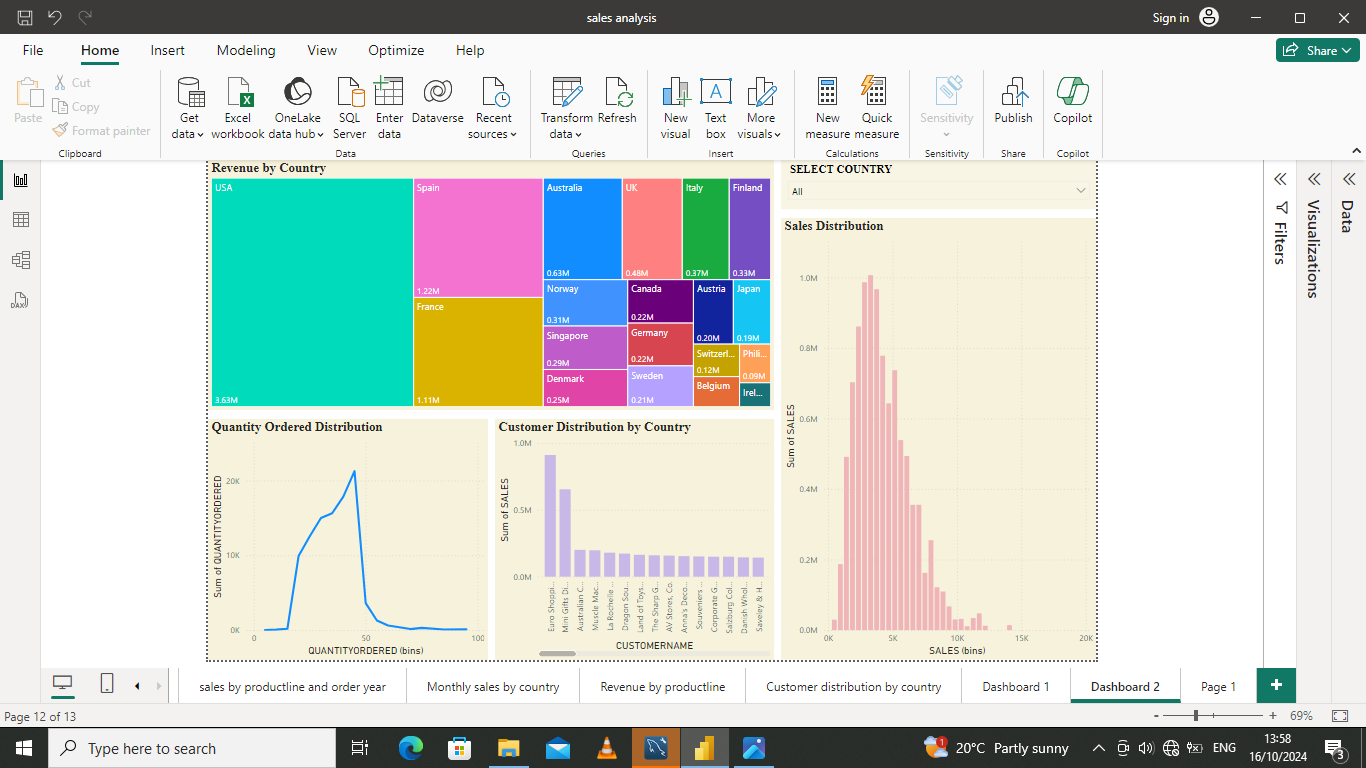

In [25]:
image

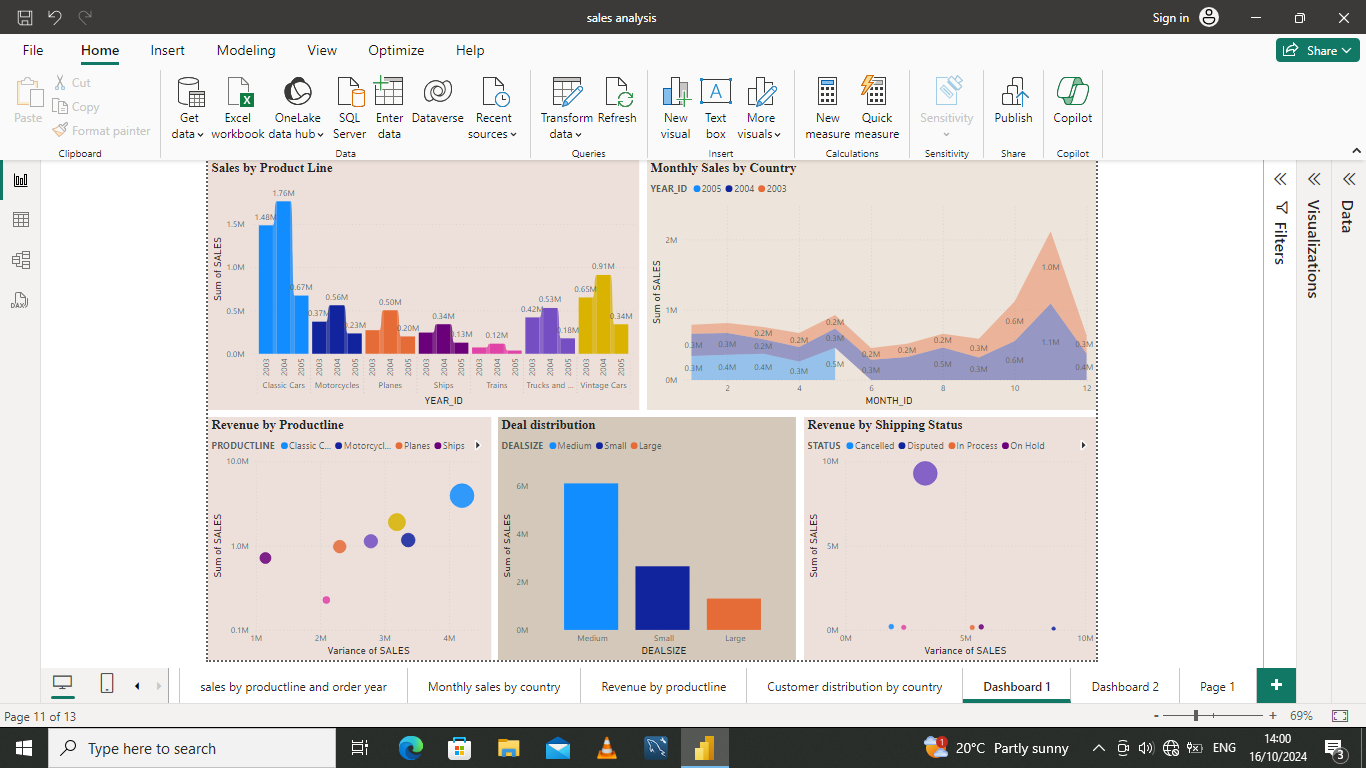

In [27]:
image2